In [2]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Reading Data

In [3]:
df = pd.read_csv("../data/train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# General statistics

In [4]:
# number of elements in the df
df.size

85000

In [5]:
df.count()

state                            4250
account_length                   4250
area_code                        4250
international_plan               4250
voice_mail_plan                  4250
number_vmail_messages            4250
total_day_minutes                4250
total_day_calls                  4250
total_day_charge                 4250
total_eve_minutes                4250
total_eve_calls                  4250
total_eve_charge                 4250
total_night_minutes              4250
total_night_calls                4250
total_night_charge               4250
total_intl_minutes               4250
total_intl_calls                 4250
total_intl_charge                4250
number_customer_service_calls    4250
churn                            4250
dtype: int64

In [6]:
df.shape

(4250, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

# Missing Values

In [9]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending and remove columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_df = missing_values_table(df)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


In [10]:
# number of rows with missing values for the whole dataset
def count_missing_rows(df):

    # Calculate total number rows with missing values
    missing_rows = sum([True for idx,row in df.iterrows() if any(row.isna())])

    # Calculate total number of rows
    total_rows = df.shape[0]

    # Calculate the percentage of missing rows
    print(f"{missing_rows} rows({round(((missing_rows/total_rows) * 100), 2)}%) contain atleast one missing value.")

count_missing_rows(df)

0 rows(0.0%) contain atleast one missing value.


# Duplicates

In [11]:
df.duplicated().sum()


0

# Data Types

In [10]:
#check if there are columns with mixed data types.
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


In [12]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [13]:
# get the columns with object data type
string_columns = df.select_dtypes(include='object').columns.tolist()
string_columns

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [14]:
def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")
convert_to_string(df, string_columns)

# Visualizaton

## Univariate Analysis

### Categorical Data

In [ ]:
# Categorical data
# state, area_code, international_plan, voice_mail_plan, churn 

In [23]:
def plotly_plot_pie(df, column, limit=None, title=None):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    if limit:
        a.loc[a['count'] < limit, column] = f'Other {column}s'
    if title == None:
        title=f'Distribution of {column}'
    fig = px.pie(a, values='count', names=column, title=title, width=800, height=500)
    fig.show()
plotly_plot_pie(df, 'churn')

In [25]:
def plotly_plot_pie(df, column, limit=None, title=None):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    if limit:
        a.loc[a['count'] < limit, column] = f'Other {column}s'
    if title == None:
        title=f'Distribution of {column}'
    fig = px.pie(a, values='count', names=column, title=title, width=800, height=500)
    fig.show()
plotly_plot_pie(df, 'area_code')

In [32]:
def plotly_plot_hist(df, column, color=['cornflowerblue'], title=None):
    if title == None:
        title=f'Distribution of {column}'
    fig = px.histogram(
            df,
            x=column,
            marginal='box',
            color_discrete_sequence=color,
            title=title)
    fig.update_layout(bargap=0.01)
    fig.show()
plotly_plot_hist(df, 'international_plan')

In [31]:
def plotly_plot_hist(df, column, color=['cornflowerblue'], title=None):
    if title == None:
        title=f'Distribution of {column}'
    fig = px.histogram(
            df,
            x=column,
            marginal='box',
            color_discrete_sequence=color,
            title=title)
    fig.update_layout(bargap=0.01)
    fig.show()
plotly_plot_hist(df, 'area_code')

In [33]:
def plotly_plot_hist(df, column, color=['cornflowerblue'], title=None):
    if title == None:
        title=f'Distribution of {column}'
    fig = px.histogram(
            df,
            x=column,
            marginal='box',
            color_discrete_sequence=color,
            title=title)
    fig.update_layout(bargap=0.01)
    fig.show()
plotly_plot_hist(df, 'voice_mail_plan')

### Numerica Data

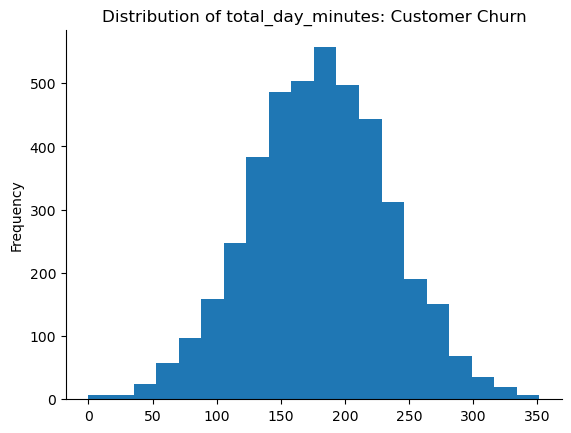

In [42]:
# Numerical data
# account_length, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls

df['total_day_minutes'].plot(kind='hist', bins=20, title='Distribution of total_day_minutes: Customer Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)

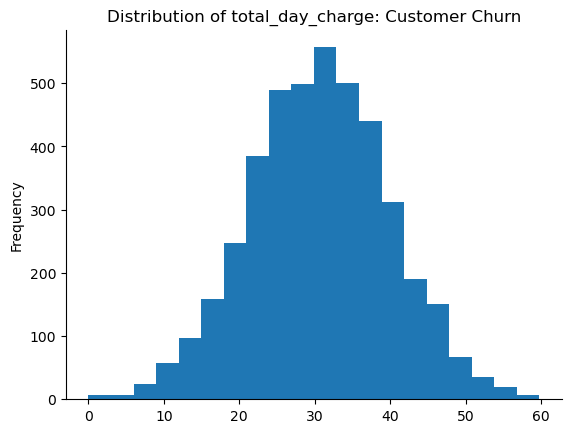

In [43]:
df['total_day_charge'].plot(kind='hist', bins=20, title='Distribution of total_day_charge: Customer Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)

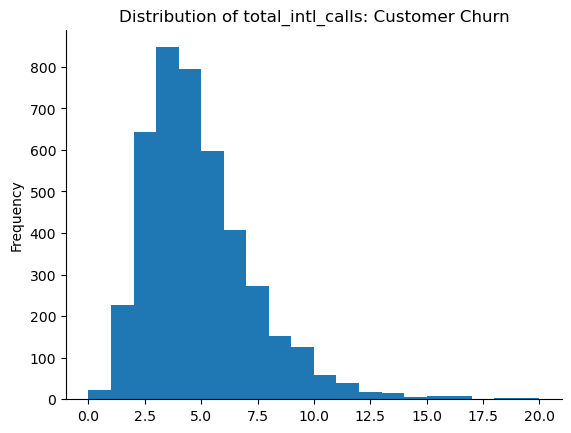

In [44]:
df['total_intl_calls'].plot(kind='hist', bins=20, title='Distribution of total_intl_calls: Customer Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)

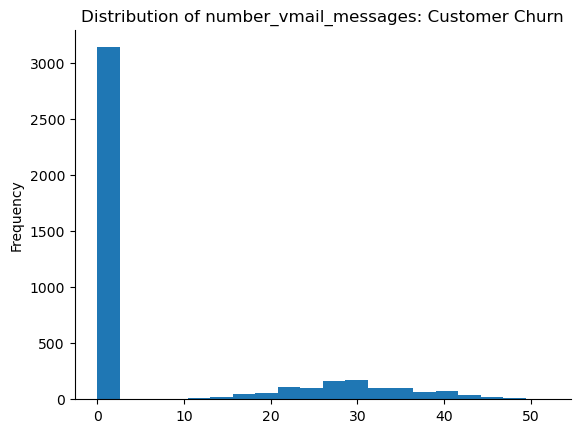

In [41]:
df['number_vmail_messages'].plot(kind='hist', bins=20, title='Distribution of number_vmail_messages: Customer Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)

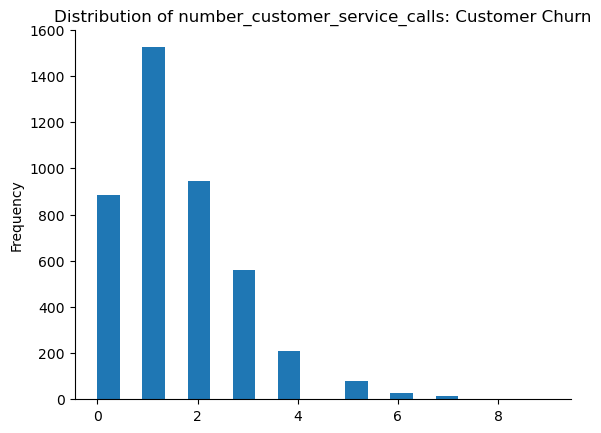

In [40]:
df['number_customer_service_calls'].plot(kind='hist', bins=20, title='Distribution of number_customer_service_calls: Customer Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)


# Feature Engineering

## Aggregate Features

In [15]:
# Numerical Data Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00
